In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_17084\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
m10_v10_L2_s2=torch.tensor([[[100.0000,  76.1603,   1.9093,  92.5000],
         [ 99.9892,  40.3670,   0.6826,  94.4800],
         [100.0000,  51.7572,   0.5263,  96.6000],
         [ 99.9184,  72.4551,  30.7692,  99.2800],
         [ 99.8890,  48.4375,   8.6957,  99.3500],
         [ 99.8595,  51.7241,  22.2222,  99.6500],
         [ 99.8296,  25.0000,   0.0000,  99.6400],
         [ 99.8599,  66.6667,   0.0000,  99.8400]],

        [[100.0000,  39.9417,   6.9031,  67.9500],
         [100.0000,  39.1075,   0.7609,  78.1800],
         [ 99.4151,  35.5042,   1.5198,  90.1100],
         [ 99.6315,  33.7413,   7.4627,  94.0100],
         [ 99.8034,  34.3284,   8.6957,  97.4200],
         [ 99.7969,  30.9353,   7.1429,  98.7100],
         [ 99.7485,  17.5439,   0.0000,  99.2700],
         [ 99.8395,  30.3030,   0.0000,  99.6000]],

        [[ 98.5517,  42.2727,   7.0826,  30.4100],
         [ 93.0782,  36.3503,   9.9897,  49.5700],
         [ 94.9369,  31.4625,  13.3472,  67.0800],
         [ 97.7454,  37.1169,  15.2709,  82.0400],
         [ 98.8381,  38.2009,  19.6262,  92.8000],
         [ 99.5225,  41.0029,  18.5185,  97.3200],
         [ 99.7272,  45.0000,   0.0000,  99.1700],
         [ 99.7998,  50.0000,   0.0000,  99.7500]],

        [[100.0000,  50.2488,  10.0874,  23.1500],
         [ 95.4395,  29.9715,  10.9705,  30.4200],
         [ 86.0849,  22.5270,   9.7087,  43.4800],
         [ 90.2145,  24.6405,  14.2405,  66.1400],
         [ 97.2756,  38.1634,   9.6491,  89.2600],
         [ 99.2994,  55.1724,  75.0000,  98.0100],
         [ 99.8798,  83.3333, 100.0000,  99.8600],
         [100.0000,   0.0000,   0.0000, 100.0000]],

        [[100.0000,  52.7089,   8.7222,  15.6300],
         [ 85.5172,  34.8093,   7.7042,  18.4000],
         [ 76.7367,  26.5794,   8.1271,  30.4700],
         [ 78.7796,  21.4411,  10.1049,  51.9200],
         [ 96.3461,  44.6932,  21.9780,  89.4400],
         [ 99.6652,  71.6312,   0.0000,  99.2600],
         [ 99.9700,   0.0000,   0.0000,  99.9700],
         [100.0000,   0.0000,   0.0000, 100.0000]],

        [[100.0000,  51.2104,   9.3339,  11.9000],
         [ 89.5833,  33.0846,   8.3415,  13.8800],
         [ 72.7674,  23.7564,   6.4164,  18.5000],
         [ 59.6267,  18.4579,   6.5232,  34.1100],
         [ 94.7205,  49.4624,  27.2727,  91.7000],
         [100.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000, 100.0000]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05], dtype=torch.float64)

m10_v10_L2_s2.size()

torch.Size([6, 8, 4])

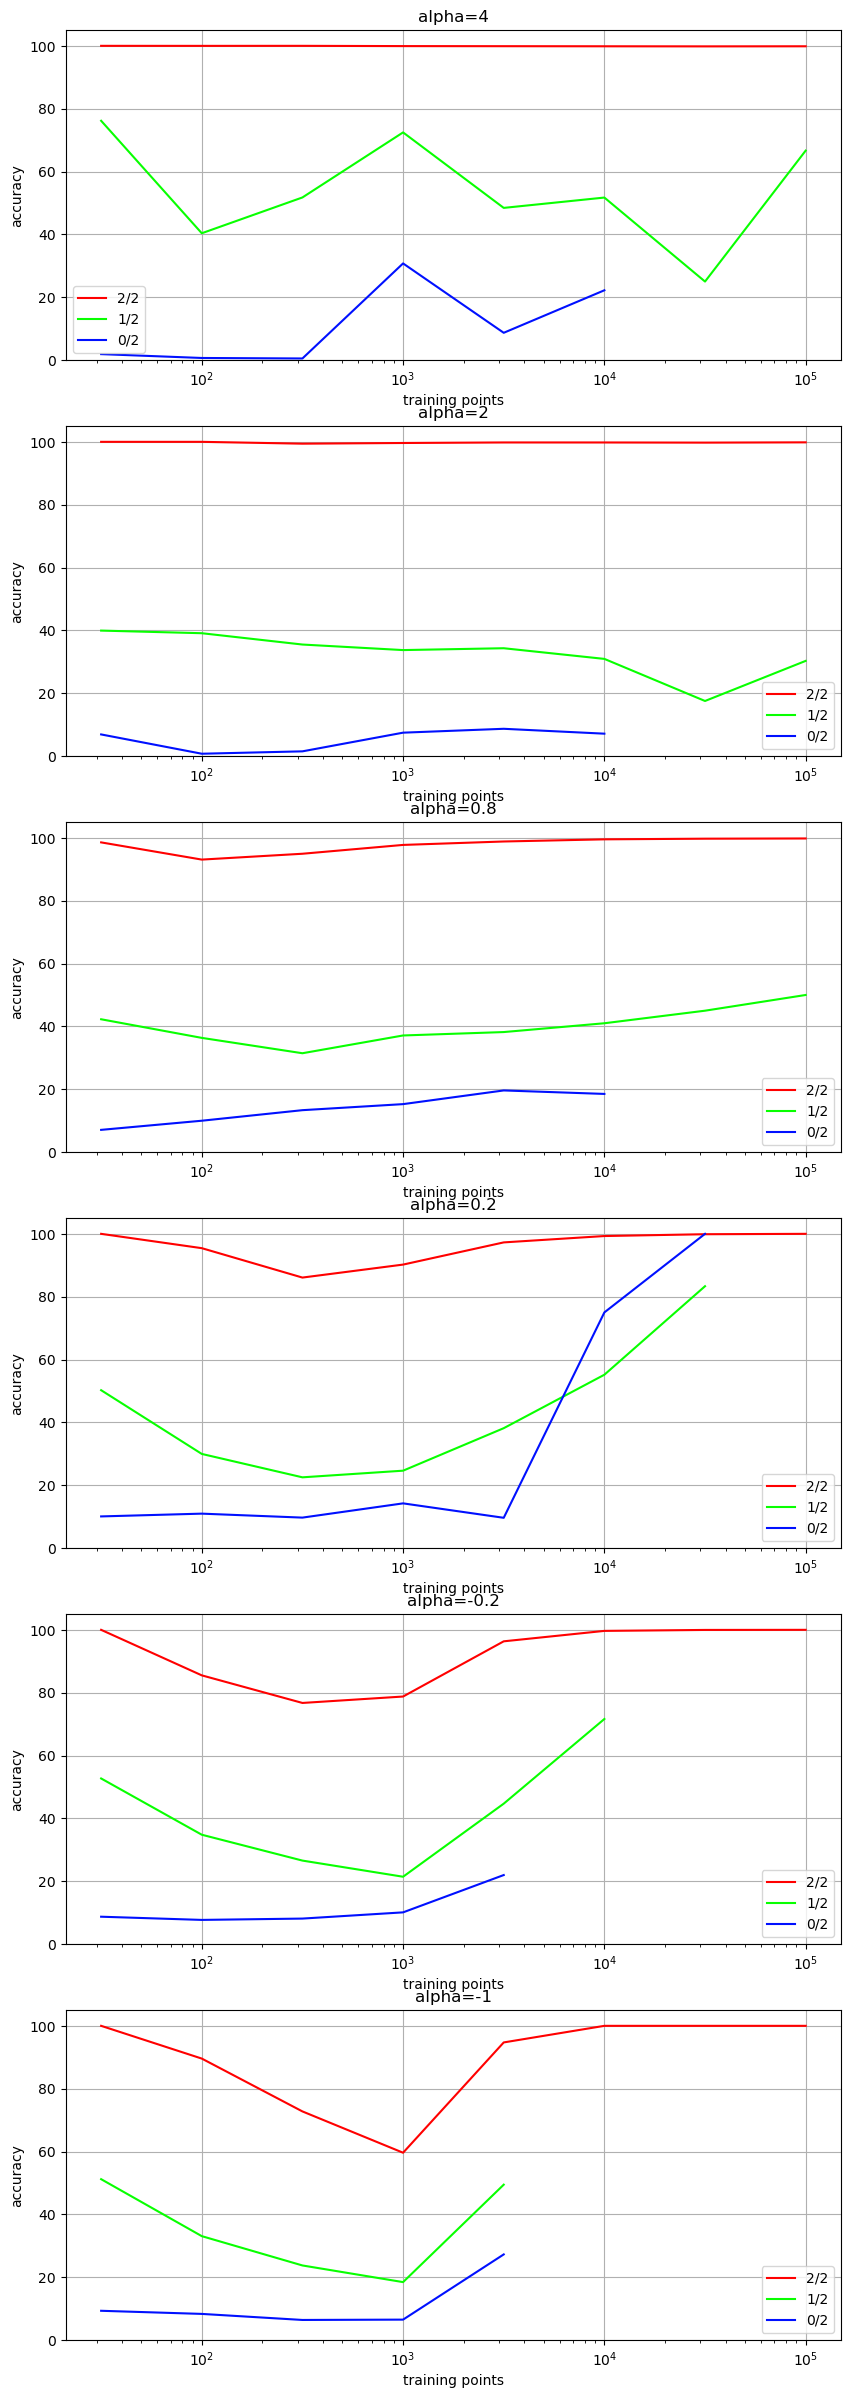

In [4]:
fig, axis = plt.subplots(6, 1, figsize=(10, 30))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["2/2", "1/2", "0/2"]
for j in range(6):
    for i in range(3):
        data = m10_v10_L2_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/3), label=title_list[i])
    axis[j].legend()
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    